In [211]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")#REMOVES ANNOYING WARNINGS

In [212]:
pd.set_option('display.max_columns', None) #VIEW ALL COLUMNS BECAUSE SOME ARE HIDDEN BY DEFAULT

In [213]:
df = pd.read_csv("privatepropertyng5.csv")
df.tail(60)

,Unnamed: 0,Title,Price,Location,Beds,Baths,Description,Garage
2640,2640,3bedroom brandnew Terrace with Jaccuzi\n,"N1,500,000 per year",Ajah,3,4,3 Bedroom Flat & Apartment,0
2641,2641,3bedroom in lekki phase one,"N3,000,000 per year","Lekki Phase 1, Lekki",3,4,3 Bedroom Flat & Apartment,0
2642,2642,luxury 3 Bedroom flat come with a bq and a mai...,"N3,000,000 per year","Oregun, Ikeja",3,4,3 Bedroom Flat & Apartment,0
2643,2643,2 Bedroom Flat for Rent,"N450,000 per year","Ibeju Lekki, Ajah",2,3,2 Bedroom Bungalow,0
2644,2644,Luxury miniflat for rent,"N500,000 per year","Langbasa, Ajah",1,1,House\n,0
2645,2645,4 Bedroom Wing Duplex All Rooms En-Suite,"N4,500,000 per year","Ikeja/ Adeniyi Jones, Lagos, Ikeja , Ikeja",4,4,4 Bedroom Duplex,0
2646,2646,Newly built 2 bedroom flat Lekki,"N2,500,000 per year","Victoria Garden City, Lekki",2,3,2 Bedroom Flat & Apartment,0
2647,2647,3 Bedroom flat to let at Surulere 900k,"N900,000 per year","Aguda , Surulere",3,2,3 Bedroom Flat & Apartment,0
2648,2648,Newly built 3 bedroom flat Lekki,"N4,500,000 per year","Victoria Garden City, Lekki",3,4,3 Bedroom Flat & Apartment,0
2649,2649,brand new 2 and 3 bedroom flats to let in ikate,"N2,600,000 per year","Off Kusenla Road, Ikate, Ikate Elegushi, Lekki",2,2,2 Bedroom Flat & Apartment,0


# DATA PREPROCESSING

In [214]:
df.describe(include="all")

,Unnamed: 0,Title,Price,Location,Beds,Baths,Description,Garage
count,2700.000000,2700,2700,2700,2.700000e+03,2700.000000,2700,2700.000000
unique,NaN,2198,235,1039,NaN,NaN,74,NaN
top,NaN,3 Bedroom Apartment,"N3,500,000 per year","Lekki Phase 1, Lekki",NaN,NaN,3 Bedroom Flat & Apartment,NaN
freq,NaN,25,282,150,NaN,NaN,714,NaN
mean,1349.500000,NaN,NaN,NaN,2.225404e+03,3.334074,NaN,0.553333
std,779.567188,NaN,NaN,NaN,8.276132e+04,1.776578,NaN,1.597669
min,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,0.000000
25%,674.750000,NaN,NaN,NaN,3.000000e+00,3.000000,NaN,0.000000
50%,1349.500000,NaN,NaN,NaN,3.000000e+00,4.000000,NaN,0.000000
75%,2024.250000,NaN,NaN,NaN,4.000000e+00,4.000000,NaN,0.000000


Some columns contain irrelevant information. "Unnamed" is just serial number and "Title" has high cardinality.
"Title" also shares similar info with "Description" for a number of rows

In [215]:
df.drop(columns=["Unnamed: 0","Title"],axis=1,inplace=True) 

In [216]:
df.head()

,Price,Location,Beds,Baths,Description,Garage
0,"N25,000,000 per year","Ocean Parade, Banana Island, Banana Island, ...",3,5,3 Bedroom Flat & Apartment,0
1,"N2,500,000 per year","Ogudu Lagos , Ogudu G.R.A, Ketu",4,5,4 Bedroom Duplex,0
2,"N2,300,000 per year","Oniru, Victoria Island",1,1,Flat & Apartment,1
3,"N3,000,000 per year","Ikota, Lekki",4,4,4 Bedroom Terrace,2
4,"N5,500,000 per year","Off Audu Epkeka, Lekki Phase 1, Lekki",4,4,4 Bedroom Townhouse,0


In [217]:
#function to clean the location column
def clean_location(x):
    x=x.split(",")#splits the words into a list using comma as the delimiter
    x=x[-1].strip()# Takes the last part...i.e the most significnt part of the address which should reduce cardinality and removes white space around...not between the words
    x=x.split()#Splits into a list of 2 based on whitespace if the last part is made of 2 words e.g Victoria Island
    if len(x) == 1:
        return "".join(x)#convert into a word straightaway if it's just a word
    elif len(x) > 1:
        for index,elem in enumerate(x):#else it adds an underscore to bring uniformity and prevent varying amount of whitespace from increasing cardinality
            if index != len(x) - 1:
                elem = elem + "_"
                x[index] = elem
    x="".join(x)
    return x
    

In [218]:
df["real_location"] = df["Location"].apply(clean_location)#apply function above
df["real_location"] = df["real_location"].str.lower()#convert all to lowercase for uniformity of present and future data

In [219]:
check = df["real_location"].unique()
check=sorted(check)
np.array(check)

array(['abeouka_express', 'abuja_phase_1', 'abuja_phase_2',
       'abuja_phase_3', 'abuja_phase_4', 'agege', 'ajah', 'apapa',
       'benin', 'ebute_metta', 'enugu_area', 'festac', 'gbagada',
       'ibadan', 'ikeja', 'ikorodu_road', 'ikoyi', 'isolo', 'ketu',
       'lagos_extension', 'lagos_island', 'lekki', 'mushin', 'ogun_area',
       'oshodi', 'owerri', 'port_harcourt', 'surulere', 'victoria_island',
       'yaba'], dtype='<U15')

'abeoku-express' doesn't look like a place in Nigeria ..perhaps lagos-abeokuta expressway..but futher research showed the address to be in ifako-ijaiye

In [220]:
df.iloc[31]["Location"]

'  Nelson Cole Off Iju Road Via Collage Road, Iju , Abeouka Express'

In [221]:
df["real_location"].replace("abeouka_express","ifako_ijaiye",inplace=True) #replacing after research

In [222]:
np.array(sorted(df["Description"].unique())) #view all unique entries in 'Description' column

array([' 3 Bedroom Flat & Apartment', ' 3 Bedroom Office',
       ' 4 Bedroom Duplex', ' 4 Bedroom Flat & Apartment',
       ' 4 Bedroom Terrace', ' 5 Bedroom Duplex',
       ' 5 Bedroom Flat & Apartment', '10 Bedroom Duplex',
       '10 Bedroom Flat & Apartment', '12 Bedroom Office',
       '16 Bedroom Office', '2 Bedroom Bungalow',
       '2 Bedroom Commercial Property', '2 Bedroom Duplex',
       '2 Bedroom Flat & Apartment', '2 Bedroom House',
       '2 Bedroom Office', '2 Bedroom Terrace', '20 Bedroom Office',
       '2500000 Bedroom Flat & Apartment', '3 Bedroom Bungalow',
       '3 Bedroom Commercial Property', '3 Bedroom Duplex',
       '3 Bedroom Flat & Apartment', '3 Bedroom Flat & Apartment\n ',
       '3 Bedroom House', '3 Bedroom Office', '3 Bedroom Terrace',
       '3 Bedroom Townhouse', '32 Bedroom Flat & Apartment',
       '3500000 Bedroom Duplex', '4 Bedroom Bungalow',
       '4 Bedroom Commercial Property', '4 Bedroom Duplex',
       '4 Bedroom Duplex\n ', '4 Bedroom 

In [223]:
#function to remove the '\n' found attached to some entries
def remove_slash(value):
    value=value.strip()
    index = value.find("\n")
    if index != -1:
        value = value[0:index]
    return value
    
    

In [224]:
df["Description"] = df["Description"].str.lower()
df["Description"] = df["Description"].apply(remove_slash)
df["Description"].unique()

array(['3 bedroom flat & apartment', '4 bedroom duplex',
       'flat & apartment', '4 bedroom terrace', '4 bedroom townhouse',
       '4 bedroom house', '3 bedroom terrace',
       '2 bedroom flat & apartment', '12 bedroom office',
       '4 bedroom flat & apartment', 'hotel', 'warehouse',
       '3 bedroom commercial property', '5 bedroom duplex',
       '3 bedroom duplex', 'commercial property', 'house',
       '3 bedroom house', 'room or boys quarter', '9 bedroom duplex',
       '5 bedroom house', 'office', '10 bedroom flat & apartment',
       '3 bedroom bungalow', '8 bedroom terrace', '6 bedroom duplex',
       '2 bedroom duplex', '4 bedroom bungalow', '3500000 bedroom duplex',
       '5 bedroom flat & apartment', '10 bedroom duplex',
       '5 bedroom terrace', 'shop', '7 bedroom duplex', '2 bedroom house',
       '2500000 bedroom flat & apartment', '3 bedroom townhouse',
       '2 bedroom bungalow', '5 bedroom bungalow',
       '32 bedroom flat & apartment', '3 bedroom office',

In [225]:
bed_len = len("bedroom")
def clean_description(x):
    index=x.find("bedroom")#This function removes some words from some entries to reduce cardinality and increase predictive power
    if index != -1:#if 'bedroom' is found...it removes all words from the beginning to the end of the word..bedroom.. recalll that beds are already specified in bed column
        x=x[index+bed_len:]
    x=x.replace("&","and")#replace & with and for easy interpretation 
    x=x.split()#the rest behaves like the clean_location column above
    if len(x) > 1:
        for index,elem in enumerate(x):
            if index != len(x) - 1:
                elem = elem + "_"
                x[index] = elem
    x="".join(x)
    return x

In [226]:
df["real_description"]=df["Description"]

In [227]:
df["real_description"]=df["real_description"].apply(clean_description)

In [228]:
df["real_description"].unique()#end result of the cleaning function

array(['flat_and_apartment', 'duplex', 'terrace', 'townhouse', 'house',
       'office', 'hotel', 'warehouse', 'commercial_property',
       'room_or_boys_quarter', 'bungalow', 'shop'], dtype=object)

ALL THESE FORMS OF DATA PREPROCESSING E.G CONVERTING TO LOWERCASE, REPLACING WHITESPACE BETWEEN WORDS WITH UNDERSCORES E.T.C WERE
DONE TO PREVENT LITTLE THINGS LIKE WHITESPACE AND CASE FROM INCREASING CARDINALITY IN PRESENT AND FUTURE DATA

HOPEFULLY, FUTURE DATA WILL PASS THROUGH THESE CLEANING FUNCTIONS TO MAKE SURE THEY COME OUT IN SIMILAR WAY.

In [229]:
df.head()

,Price,Location,Beds,Baths,Description,Garage,real_location,real_description
0,"N25,000,000 per year","Ocean Parade, Banana Island, Banana Island, ...",3,5,3 bedroom flat & apartment,0,ikoyi,flat_and_apartment
1,"N2,500,000 per year","Ogudu Lagos , Ogudu G.R.A, Ketu",4,5,4 bedroom duplex,0,ketu,duplex
2,"N2,300,000 per year","Oniru, Victoria Island",1,1,flat & apartment,1,victoria_island,flat_and_apartment
3,"N3,000,000 per year","Ikota, Lekki",4,4,4 bedroom terrace,2,lekki,terrace
4,"N5,500,000 per year","Off Audu Epkeka, Lekki Phase 1, Lekki",4,4,4 bedroom townhouse,0,lekki,townhouse


The price column was found to contain different string patterns including per year, per month and /m2. /m2 means per metre square and such entries were removed.


In [230]:
count=0
m2_list=[]
for ind,value in enumerate(list(df["Price"].values)):
    index = value.find(" per year")
    if index != -1:
           pass
    else:
        index = value.find(" per month") 
        if index != -1:
            pass
        else:
            index = value.find(" /m2")
            if index != -1:
                count+=1
                m2_list.append(ind)
print(count)
m2_list

7


[2654, 2655, 2656, 2657, 2658, 2670, 2694]

In [231]:
df.drop(m2_list,inplace=True)

In [232]:
#cleaning function for the price column
def change_y(val):
    new_val =0
    #a default value of zero was placed so that we can check for any value not caught by our function and then 
    #trace them in the table to the original price column to see if there was any string pattern we didnt catch'''
    index = val.find(" per year")
    if index != -1: #if per year is found
        try:
            int(val[0])#it checks if the first letter of the entry is a letter i.e N for Naira 
            new_val = val[0:index].replace(",","")#if not it starts from the first character to slice
        except:
            new_val = val[1:index].replace(",","")#if so, it starts from the 2nd character to slice
        new_val = int(new_val)#converts to integer
    
    else:
        index = val.find(" per month") 
        if index != -1:
            try:
                int(val[0])
                new_val = val[0:index].replace(",","")
            except:
                new_val = val[1:index].replace(",","")
            new_val = int(new_val)
            new_val = new_val *12 #multiplies by 12 to get for a year         
    return int(new_val)    


In [233]:
#df["real_price"] = df["Price"].apply(change_y)
df["real_price"] = df["Price"].apply(change_y)

In [234]:
df.head(60)

,Price,Location,Beds,Baths,Description,Garage,real_location,real_description,real_price
0,"N25,000,000 per year","Ocean Parade, Banana Island, Banana Island, ...",3,5,3 bedroom flat & apartment,0,ikoyi,flat_and_apartment,25000000
1,"N2,500,000 per year","Ogudu Lagos , Ogudu G.R.A, Ketu",4,5,4 bedroom duplex,0,ketu,duplex,2500000
2,"N2,300,000 per year","Oniru, Victoria Island",1,1,flat & apartment,1,victoria_island,flat_and_apartment,2300000
3,"N3,000,000 per year","Ikota, Lekki",4,4,4 bedroom terrace,2,lekki,terrace,3000000
4,"N5,500,000 per year","Off Audu Epkeka, Lekki Phase 1, Lekki",4,4,4 bedroom townhouse,0,lekki,townhouse,5500000
5,"N12,000,000 per year",Ikoyi,4,4,4 bedroom house,2,ikoyi,house,12000000
6,"N3,000,000 per year","Agungi, Lekki",3,3,3 bedroom terrace,0,lekki,terrace,3000000
7,"N10,000,000 per year",Ikoyi,4,4,4 bedroom house,2,ikoyi,house,10000000
8,"N2,800,000 per year","Phase 2, Lekki Expressway, Lekki",4,4,4 bedroom terrace,0,lekki,terrace,2800000
9,"N5,000,000 per year","Lekki Phase 1, Lekki",4,4,4 bedroom duplex,0,lekki,duplex,5000000


In [235]:
df[df["real_price"] == 0]#no uncaught string pattern !!

,Price,Location,Beds,Baths,Description,Garage,real_location,real_description,real_price


In [236]:
new_df= df.drop(["Price","Location","Description"],axis=1)#Dropping raw columns

In [237]:
new_df.head()

,Beds,Baths,Garage,real_location,real_description,real_price
0,3,5,0,ikoyi,flat_and_apartment,25000000
1,4,5,0,ketu,duplex,2500000
2,1,1,1,victoria_island,flat_and_apartment,2300000
3,4,4,2,lekki,terrace,3000000
4,4,4,0,lekki,townhouse,5500000


In [238]:
new_df["real_description"].unique()

array(['flat_and_apartment', 'duplex', 'terrace', 'townhouse', 'house',
       'office', 'hotel', 'warehouse', 'commercial_property',
       'room_or_boys_quarter', 'bungalow', 'shop'], dtype=object)

In [239]:
#OUTLIER REMOVAL

In [240]:
new_df.isnull().any().sum()#no null values...

0

In [241]:
new_df[["Beds","Baths","Garage","real_price"]].describe(percentiles = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.96,0.97,0.98,0.99])

,Beds,Baths,Garage,real_price
count,2.693000e+03,2693.000000,2693.000000,2.693000e+03
mean,2.231189e+03,3.342740,0.554772,9.688453e+06
std,8.286878e+04,1.770722,1.599495,6.775805e+07
min,0.000000e+00,0.000000,0.000000,1.000000e+00
10%,1.000000e+00,1.000000,0.000000,1.800000e+06
20%,2.000000e+00,2.000000,0.000000,2.800000e+06
30%,3.000000e+00,3.000000,0.000000,3.300000e+06
40%,3.000000e+00,3.000000,0.000000,3.500000e+06
50%,3.000000e+00,4.000000,0.000000,4.000000e+06
60%,4.000000e+00,4.000000,0.000000,5.000000e+06


In [242]:
q = new_df["Baths"].quantile(0.99)#removing outliers..notice the 33 at the max row
new_df1 = new_df[new_df["Baths"]<q]

In [243]:
new_df1[["Beds","Baths","Garage","real_price"]].describe(percentiles = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.96,0.97,0.98,0.9999])

,Beds,Baths,Garage,real_price
count,2.666000e+03,2666.000000,2666.000000,2.666000e+03
mean,2.253694e+03,3.264066,0.527382,9.601220e+06
std,8.328720e+04,1.447790,1.258144,6.806349e+07
min,0.000000e+00,0.000000,0.000000,1.000000e+00
10%,1.000000e+00,1.000000,0.000000,1.800000e+06
20%,2.000000e+00,2.000000,0.000000,2.800000e+06
30%,3.000000e+00,3.000000,0.000000,3.300000e+06
40%,3.000000e+00,3.000000,0.000000,3.500000e+06
50%,3.000000e+00,4.000000,0.000000,4.000000e+06
60%,4.000000e+00,4.000000,0.000000,5.000000e+06


In [244]:
r = new_df1["Beds"].quantile(0.9996)#notice the large value...above 3 million
new_df2 = new_df1[new_df1["Beds"]<r]

In [245]:
new_df2[["Beds","Baths","Garage","real_price"]].describe(percentiles = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

,Beds,Baths,Garage,real_price
count,2664.000000,2664.000000,2664.000000,2.664000e+03
mean,3.133258,3.263889,0.525901,9.606176e+06
std,1.369659,1.448255,1.257380,6.808881e+07
min,0.000000,0.000000,0.000000,1.000000e+00
1%,0.000000,0.000000,0.000000,8.982000e+04
2%,0.000000,0.000000,0.000000,4.630000e+05
3%,0.000000,0.000000,0.000000,7.178000e+05
4%,0.000000,0.000000,0.000000,1.000000e+06
5%,0.000000,0.000000,0.000000,1.200000e+06
6%,0.000000,0.000000,0.000000,1.200000e+06


In [246]:
t = new_df2["real_price"].quantile(0.01)
new_df3 = new_df2[new_df2["real_price"]>t]

In [247]:
new_df3[["Beds","Baths","Garage","real_price"]].describe(percentiles = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

,Beds,Baths,Garage,real_price
count,2637.000000,2637.000000,2637.000000,2.637000e+03
mean,3.163823,3.295791,0.531286,9.704172e+06
std,1.341419,1.419473,1.262670,6.842970e+07
min,0.000000,0.000000,0.000000,9.500000e+04
10%,1.000000,1.000000,0.000000,2.000000e+06
20%,2.000000,3.000000,0.000000,2.800000e+06
30%,3.000000,3.000000,0.000000,3.500000e+06
40%,3.000000,3.000000,0.000000,3.500000e+06
50%,3.000000,4.000000,0.000000,4.000000e+06
60%,4.000000,4.000000,0.000000,5.000000e+06


FOR THE ENCODING OF THE LOCATIONS, A TYPE OF ENCODING WAS USED ...THE TOP 14 ENTRIES WERE USED FOR THE ENCODING.
THIS WAS THE TECHNIQUE USED IN THE KDD ORANGE COMPETITION

In [248]:
new_df3[["real_location"]].value_counts().sort_values(ascending=False)

real_location  
lekki              1249
ikoyi               671
victoria_island     351
ikeja               142
ajah                 69
gbagada              24
ketu                 19
abuja_phase_1        16
yaba                 16
ibadan               14
abuja_phase_2        13
ikorodu_road         12
surulere              5
agege                 5
oshodi                4
ogun_area             4
apapa                 3
isolo                 3
abuja_phase_3         2
port_harcourt         2
lagos_extension       2
lagos_island          2
festac                2
abuja_phase_4         1
mushin                1
owerri                1
benin                 1
ifako_ijaiye          1
ebute_metta           1
enugu_area            1
dtype: int64

In [249]:
top_14_locations = [x for x in new_df3["real_location"].value_counts().sort_values(ascending=False).head(14).index]
top_14_locations

['lekki',
 'ikoyi',
 'victoria_island',
 'ikeja',
 'ajah',
 'gbagada',
 'ketu',
 'yaba',
 'abuja_phase_1',
 'ibadan',
 'abuja_phase_2',
 'ikorodu_road',
 'surulere',
 'agege']

In [250]:
def one_hot_top(data,variable,top_labels):
    for label in top_labels:
        data[variable+"_"+label] = np.where(data[variable] == label,1,0)
        

In [251]:
new_df4=new_df3.copy()

In [252]:
one_hot_top(new_df4,"real_location",top_14_locations)

In [253]:
new_df4.head()

,Beds,Baths,Garage,real_location,real_description,real_price,real_location_lekki,real_location_ikoyi,real_location_victoria_island,real_location_ikeja,real_location_ajah,real_location_gbagada,real_location_ketu,real_location_yaba,real_location_abuja_phase_1,real_location_ibadan,real_location_abuja_phase_2,real_location_ikorodu_road,real_location_surulere,real_location_agege
0,3,5,0,ikoyi,flat_and_apartment,25000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,4,5,0,ketu,duplex,2500000,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,1,1,victoria_island,flat_and_apartment,2300000,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,4,4,2,lekki,terrace,3000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,4,0,lekki,townhouse,5500000,1,0,0,0,0,0,0,0,0,0,0,0,0,0


FOR THE DESCRIPTION COLUMN, A NORMALONE HOT ENCODING WAS DONE REMOVING THE LEAST FREQUENT ENTRY TO AVOID DUMMY VARIABLE TRAP

In [254]:
new_df4[["real_description"]].value_counts().sort_values(ascending=False)

real_description    
flat_and_apartment      1144
duplex                   894
terrace                  200
office                   124
house                    113
commercial_property       62
shop                      25
warehouse                 25
townhouse                 19
bungalow                  16
hotel                      8
room_or_boys_quarter       7
dtype: int64

In [255]:
top_descriptions = list(new_df4["real_description"].unique())
top_descriptions.remove("room_or_boys_quarter")#AVOIDING DUMMY VARIABLE TRAP

In [256]:
one_hot_top(new_df4,"real_description",top_descriptions)

In [257]:
new_df4.head()

,Beds,Baths,Garage,real_location,real_description,real_price,real_location_lekki,real_location_ikoyi,real_location_victoria_island,real_location_ikeja,real_location_ajah,real_location_gbagada,real_location_ketu,real_location_yaba,real_location_abuja_phase_1,real_location_ibadan,real_location_abuja_phase_2,real_location_ikorodu_road,real_location_surulere,real_location_agege,real_description_flat_and_apartment,real_description_duplex,real_description_terrace,real_description_townhouse,real_description_house,real_description_hotel,real_description_warehouse,real_description_commercial_property,real_description_office,real_description_bungalow,real_description_shop
0,3,5,0,ikoyi,flat_and_apartment,25000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,4,5,0,ketu,duplex,2500000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,1,1,victoria_island,flat_and_apartment,2300000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4,4,2,lekki,terrace,3000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,4,4,0,lekki,townhouse,5500000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# MODEL BUILDING

 LINEAR REGRESSION

Linear Regression has some assumptions that we will check

NORMALITY ,ZERO MEAN AND HOMOSCEDASTICITY

HETEROSCEDASTICITY WAS PREVENTED BY TRANSFORMING THE DEPENDENT VARIABLE. ZERO MEAN OF ERROR TERMS WOULD BE ENSURED BY INCLUDING AN INTERCEPT.SKLEARN DOES THIS BY DEFAULT. LASTLY, DISTPLOT OF (TRUE-Y) - (PREDICTED-Y) WILL BE CHECKED AFTER PREDICTING VALUES WITH OUR TRAINED MODEL 

<AxesSubplot:xlabel='real_price', ylabel='Density'>

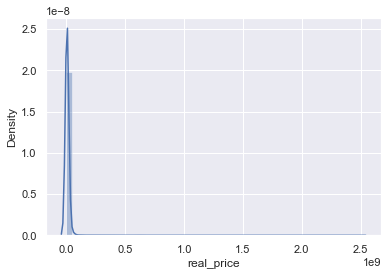

In [258]:
sns.distplot(new_df4["real_price"])

In [259]:
new_df4["real_price"].skew()

32.888172292451756

In [260]:
new_df4["real_price"].kurt()

1143.586740001381

SKEW AND KURTOSIS SHOWED THE DISTRIBUTION PLOTS TO BE HIGHLY SKEWED AND LEPTOKURTIC SO WE ARE GONNA TRY 5 METHODS OF FEATURE TRANSFORMATION TO SEE THE BEST

In [261]:
from scipy import stats

def logify(x):
    if int(x) == 0:#RETURN 0 IF INITIAL VALUE IS ZERO TO PREVENT WEIRD VALUES
        return 0
    else:
        return np.log(x)
    
def recipro(x):
     if int(x) == 0:
        return 0
     else:
        return 1/x
    
def box_cox(x):
    if int(x) == 0:
        return 0
    else:
        box,param = stats.boxcox(x)
        return box
    

In [262]:
new_df4["box_cox"],param = stats.boxcox(new_df4.real_price+1)#BOX-COX
new_df4["log"] = new_df4["real_price"].apply(logify)#LOGARITHMIC
new_df4["recipro"] = new_df4["real_price"].apply(recipro)#RECIPROCAL
new_df4["sqroot"] = new_df4["real_price"]**(1/2)#SQUARE ROOT
new_df4["exp_col"] = new_df4["real_price"]**(1/5)#EXPONENTIAL

In [263]:
#FUNCTION TO COMPARE PLOT TYPES FOR THE FEATURE TRANSFORMATION 
def diagnostic_plot(df,variable):
    plt.figure(figsize =(15,6))
    plt.subplot(1,2,1)
    plt.title(variable)
    df[variable].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[variable],dist="norm",plot=plt)

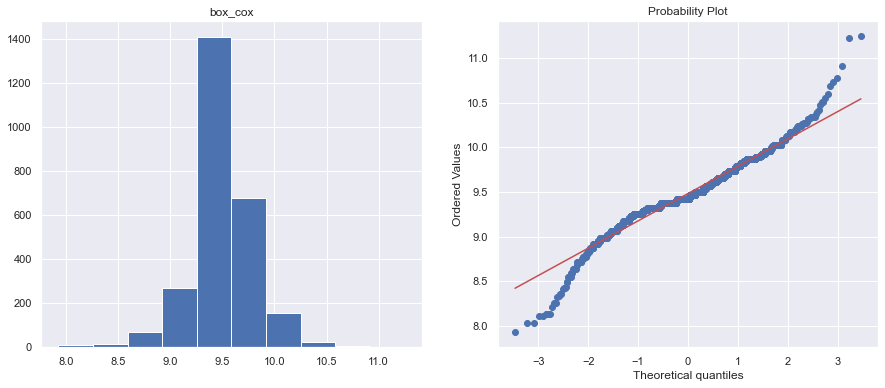

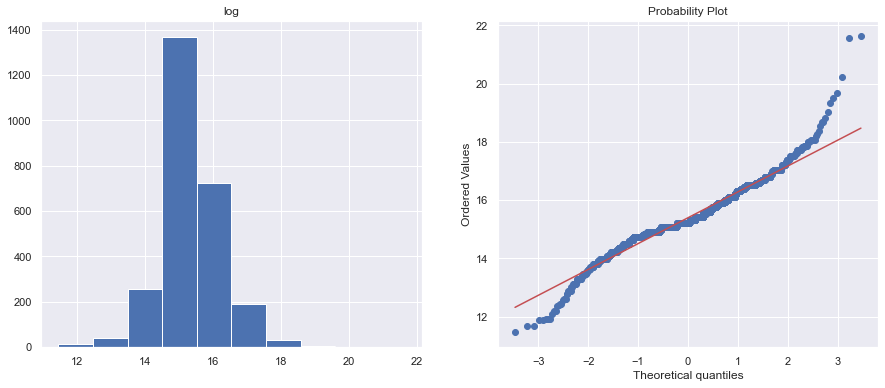

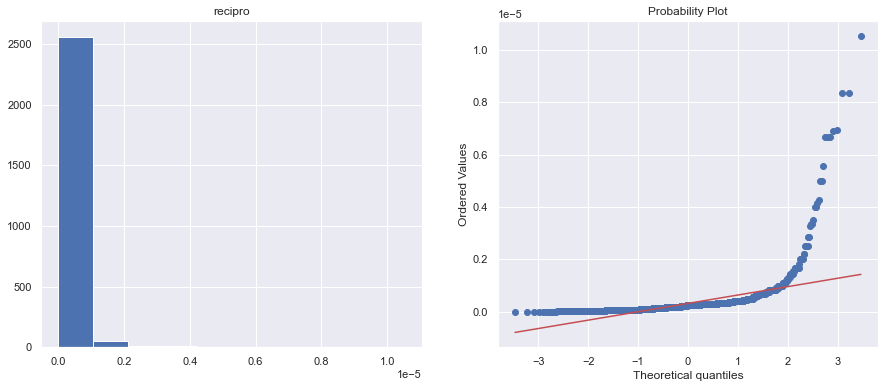

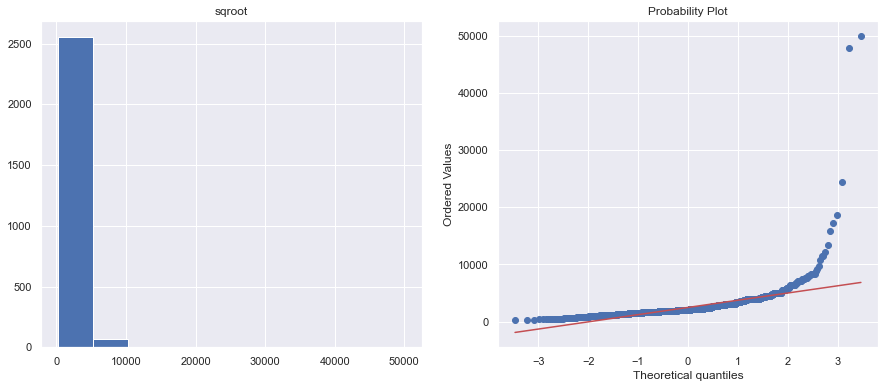

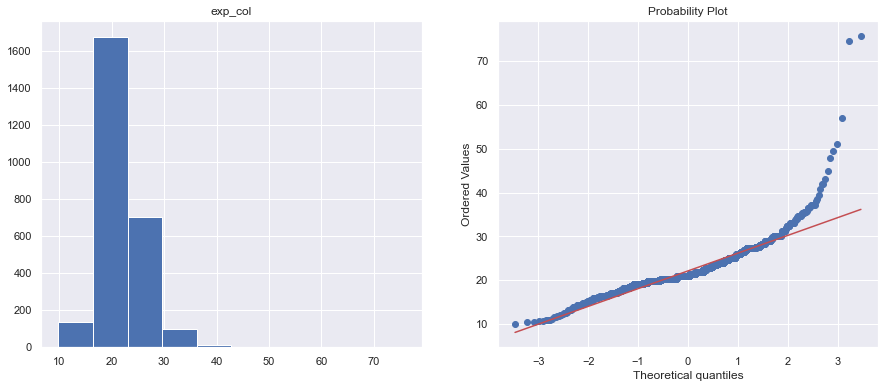

In [264]:
for col in new_df4.iloc[:,-5:]:
    diagnostic_plot(new_df4,col)

In [265]:
#THIS MAKES IT CLEAR IN CHOOSING BETWEEN THE LOG AND BOX-COX...THE BOX-COX HAS A LOWER SKEW AND KURTOSIS IS WITHIN -3 AND 3
for col in new_df4.iloc[:,-5:]:
    print(col.upper())
    print("skew: ",new_df4[col].skew())
    print("kurt: ",new_df4[col].kurt())
    print("\n")

BOX_COX
skew:  -0.06054952242814881
kurt:  2.9087253703963567


LOG
skew:  0.414036792265442
kurt:  3.4991494172381996


RECIPRO
skew:  0.0
kurt:  123.5072103659956


SQROOT
skew:  13.245753215652764
kurt:  294.87972299133304


EXP_COL
skew:  2.4931689992258637
kurt:  20.454195708809817




In [266]:
new_df4 = new_df4.iloc[:,:-4].copy()

In [267]:
new_df4.rename({"box_cox":"standard_price"},inplace=True,axis=1)

In [268]:
new_df4.head()

,Beds,Baths,Garage,real_location,real_description,real_price,real_location_lekki,real_location_ikoyi,real_location_victoria_island,real_location_ikeja,real_location_ajah,real_location_gbagada,real_location_ketu,real_location_yaba,real_location_abuja_phase_1,real_location_ibadan,real_location_abuja_phase_2,real_location_ikorodu_road,real_location_surulere,real_location_agege,real_description_flat_and_apartment,real_description_duplex,real_description_terrace,real_description_townhouse,real_description_house,real_description_hotel,real_description_warehouse,real_description_commercial_property,real_description_office,real_description_bungalow,real_description_shop,standard_price
0,3,5,0,ikoyi,flat_and_apartment,25000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,10.027031
1,4,5,0,ketu,duplex,2500000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,9.255174
2,1,1,1,victoria_island,flat_and_apartment,2300000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,9.224861
3,4,4,2,lekki,terrace,3000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,9.320852
4,4,4,0,lekki,townhouse,5500000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,9.533366


In [269]:
#LINEARITY

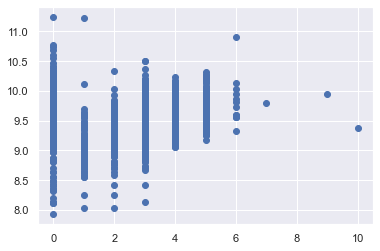

In [270]:
plt.scatter(new_df4["Beds"],new_df4["standard_price"])

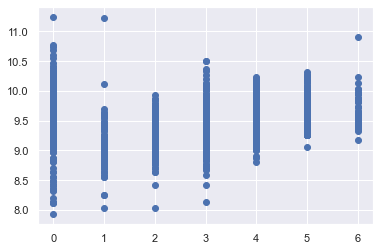

In [271]:
plt.scatter(new_df4["Baths"],new_df4["standard_price"])

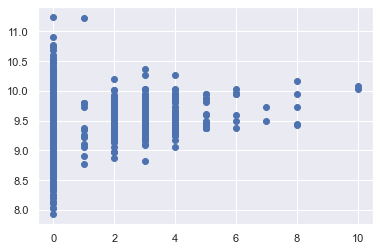

In [272]:
plt.scatter(new_df4["Garage"],new_df4["standard_price"])

BASED ON THE PLOTS ABOVE, WE CAN SAY THAT THERE EXISTS, A DEGREE OF LINEARITY BETWEEN THE DEPENDENT AND INDEPENDENT VARIABLES. FOR BEDS AND BATHS, THE PLOTS WERE SIMILAR. THE PLOTS WERE THAT OF DISCRETE VARIABLES EXPLAINING THE APPEARANCE.

THE THIRD CHECK IS NO ENDOGENEITY OF REGRESSORS. OUR RESULT MIGHT GIVE US A HINT ON THAT.I.E WHETHER WE LEFT OUT AN IMPORTANT VARIABLE THAT GOT INCLUDED IN THE ERROR.


THE 4TH CHECK IS NO AUTOCORRELATION WHICH IS NOT A PROBLEM IN THIS DATASET BECAUSE IT REFLECTS A PARTICULAR STATE IN TIME I.E IT IS NOT PANEL OR TIME SERIES DATA. IT IS CROSS-SECTIONAL DATA. SECTIONS OF THE DATA DO NOT HAVE DEPENDENCIES ON THEMSELVES

THE 5TH CHECK IS NO MULTICOLLINEARITY.

In [273]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #CHECK FOR MULTICOLLINEARITY

In [274]:
variables = new_df4[["Baths","Beds","Garage"]] 
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,63.401227,Baths
1,63.754957,Beds
2,1.225342,Garage


VIF ABOVE 5 IS CONSIDERED NOT GOOD

In [275]:
variables = new_df4[["Beds","Garage"]] #SO LET'S DROP BATHS
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,1.224979,Beds
1,1.224979,Garage


In [276]:
x=new_df4.drop(["Baths","real_location","real_description","standard_price","Garage"],axis=1)
y=new_df4[["standard_price"]]

NB:I DROPPED GARAGE ABOVE ALSO AND THAT IS BECAUSE IT IS USELESS..I TRIED ADDING IT ..IT DOESN'T EVEN ADD ANY PREDICTIVE POWER AND THE P-VALUE AS REPORTED 
    BY STATSMODELS WAS VERY HIGH

In [277]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

NO NEED FOR SCALING BECAUSE AMONG THE FEATURES, BEDS WHICH ISN'T CATEGORICAL HAS VALUES WITHIN A SMALL RANGE..I TRIED SCALING AND DIDN'T SEE ANY DIFFERENCE IN THE LINEAR REGRESSION

In [278]:
#STATSMODELS
import statsmodels.api as sm
from statsmodels.api import OLS
x_train_const = sm.add_constant(x_train)# THIS ENSURES ZERO MEAN OF ERROR TERMS
result1 = sm.OLS(y_train,x_train_const).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         standard_price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     98.56
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        03:20:30   Log-Likelihood:                 295.90
No. Observations:                2109   AIC:                            -535.8
Df Residuals:                    2081   BIC:                            -377.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    8.4949      0.094     90.128      0.000       8.310       8.680
Beds                                     0.0979      0.006     16.426      0.000       0.086       0.110
real_price                            1.043e-09   6.26e-11     16.657      0.000     9.2e-10    1.17e-09
real_location_lekki                      0.3295      0.047      7.044      0.000       0.238       0.421
real_location_ikoyi                      0.6970      0.047     14.787      0.000       0.605       0.789
real_location_victoria_island            0.5331      0.048     11.154      0.000       0.439       0.627
real_location_ikeja                      0.2935      0.049      5.987      0.000       0.197       0.390
real_location_ajah                       0.0443      0.054      0.816      0.415      -0.062       0.151
real_location_gbagada                    0.1589      0.064      2.485      0.013       0.033       0.284
real_location_ketu                       0.2252      0.070      3.200      0.001       0.087       0.363
real_location_yaba                       0.2192      0.084      2.600      0.009       0.054       0.385
real_location_abuja_phase_1              0.4922      0.077      6.396      0.000       0.341       0.643
real_location_ibadan                     0.0706      0.080      0.881      0.379      -0.087       0.228
real_location_abuja_phase_2              0.3682      0.079      4.653      0.000       0.213       0.523
real_location_ikorodu_road               0.0891      0.082      1.088      0.277      -0.072       0.250
real_location_surulere                   0.0318      0.116      0.275      0.783      -0.195       0.258
real_location_agege                     -0.1455      0.133     -1.090      0.276      -0.407       0.116
real_description_flat_and_apartment      0.1986      0.084      2.367      0.018       0.034       0.363
real_description_duplex                  0.1929      0.086      2.247      0.025       0.025       0.361
real_description_terrace                 0.1875      0.087      2.167      0.030       0.018       0.357
real_description_townhouse               0.1845      0.099      1.864      0.062      -0.010       0.379
real_description_house                   0.2343      0.088      2.658      0.008       0.061       0.407
real_description_hotel                   1.1449      0.120      9.502      0.000       0.909       1.381
real_description_warehouse               1.2011      0.098     12.242      0.000       1.009       1.393
real_description_commercial_property     0.6783      0.088      7.685      0.000       0.505       0.851
real_description_office                  0.4878      0.085      5.739      0.000       0.321       0.655
real_description_bungalow             

In [279]:
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(x_train,y_train)
y_pred = linear_regressor.predict(x_test)
r2_score(y_test,y_pred)

0.523098091812547

<AxesSubplot:ylabel='Density'>

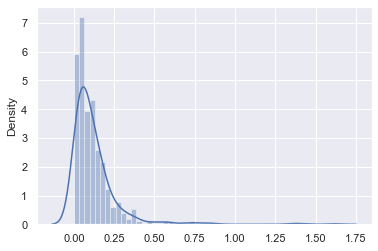

In [280]:
pred_diff = np.abs(y_test-y_pred)
sns.distplot(pred_diff)

In [281]:
print(f' skew:{pred_diff.skew()} kurtosis:{pred_diff.kurt()}')

 skew:standard_price    4.710756
dtype: float64 kurtosis:standard_price    32.433247
dtype: float64


THE PLOT ABOVE IN CONJUCTION WITH THE SKEW AND KURTOSIS VALUES ABOVE SHOWS A LACK OF NORMALITY IN THE ERROR TERMS 

NOW LET'S WORK WITH OTHER ALGORITHMS

In [282]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from lightgbm import LGBMRegressor

In [283]:
models_list = {
    "LinearRegression":LinearRegression(),
    'GradientBoosting': GradientBoostingRegressor(random_state=21),
    'Bagging': BaggingRegressor(n_jobs=-1,random_state=21),
    'Extra Tree': ExtraTreesRegressor(n_jobs=-1,random_state=21),
    'DecisionTree': DecisionTreeRegressor(random_state=21),
    'Cat': CatBoostRegressor(silent=True,random_state=21),
    'XGBoost': XGBRegressor(n_jobs=-1,random_state=21),
    'XGBRF': XGBRFRegressor(random_state=21),
    "LGBM": LGBMRegressor(n_jobs=-1,random_state=21),
    'AdaBoost': AdaBoostRegressor(random_state=21),
    'RandomForest' : RandomForestRegressor(n_jobs=-1,random_state=21)
}

In [284]:
def fit_evaluate_models(models_list,x_train,x_test,y_train,y_test):
    for algo,model in models_list.items():
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        r2score=r2_score(y_test,y_pred)
        print(f'{algo}:{r2score}')

In [285]:
fit_evaluate_models(models_list,x_train,x_test,y_train,y_test)

LinearRegression:0.523098091812547
GradientBoosting:0.999945655353704
Bagging:0.9998932348517764
Extra Tree:0.9957934533064
DecisionTree:0.9996130175687739
Cat:0.9998546896711903
XGBoost:0.9999092200837095
XGBRF:0.9982954312326904
LGBM:0.9970913146841839
AdaBoost:0.9867071930023824
RandomForest:0.9999580483853341


WELL...THE BEST MODEL SO FAR IS RANDOM FOREST MODEL WITH AN ACCURACY OF 99.99%